In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from tqdm import tqdm
import numpy as np

In [32]:
file = '../../rsc/train_counts.txt'
first_read = open(file ,'r')

num_lines = sum(1 for line in open(file,'r'))
maxcount = 0
maxlength=0
len_vs_count = []
sos = []
non_sos = []
w2_vs_w3_len = []
repeating = []


for x in tqdm(first_read, total=num_lines):
    line = x.split('\t')
    ngram = line[0].split(' ')
    tuple_size = len(ngram)
    r = int(line[1])
    
    ######smoothed trigrams######
    if r < 8:
        if tuple_size == 3:
            
            ###SOS Corellation###
            if ngram[0] == '<s>':
                sos.append(r)
            else:
                non_sos.append(r)
            ###word length#######
            w2_vs_w3_len.append([len(ngram[2]),len(ngram[1])])
            
            if ngram[0] == ngram[2]:
                repeating.append(r)
            
    #############################
             
    ########unigram counts vs length##########
    if tuple_size == 1:
        len_vs_count.append([len(ngram[0]),r])
        if len(ngram[0]) > maxlength:
            maxlength = len(ngram[0])
        if r > maxcount:
            maxcount = r

repeating = np.array(repeating)          
repeating.sort()
w2_vs_w3_len = np.array(w2_vs_w3_len)
len_vs_count = np.array(len_vs_count)
sos = np.array(sos)
non_sos = np.array(non_sos)
sos.sort()
non_sos.sort()

100%|██████████| 45918515/45918515 [01:08<00:00, 667492.86it/s]


# Word length vs Count

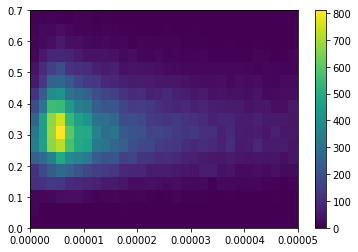

In [28]:
x = len_vs_count[:,1]/maxcount #counts
y = len_vs_count[:,0]/maxlength #len


plt.hist2d(x,y, range=[[0,0.00005],[0,0.7]], bins = (30,17))
plt.colorbar()
plt.show()

# Third word length given first word length for trigram given r < 7

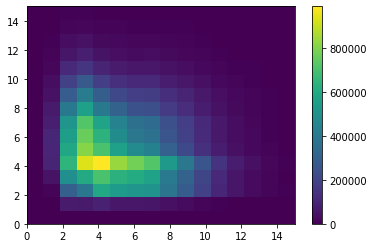

In [27]:
x = w2_vs_w3_len[:,1]
y = w2_vs_w3_len[:,0]

plt.hist2d(x,y, bins = 16, range=[[0,15],[0,15]])
plt.colorbar()
plt.show()

# Start Of Sentence counts

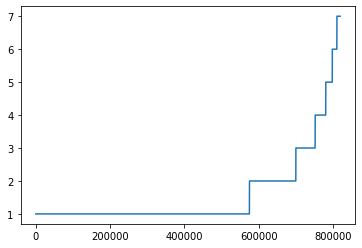

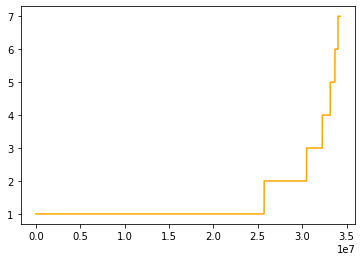

In [6]:
plt.plot(sos)
plt.show()
plt.plot(non_sos,'orange')
plt.show()

# $W_{1}$ = $W_{3}$ counts

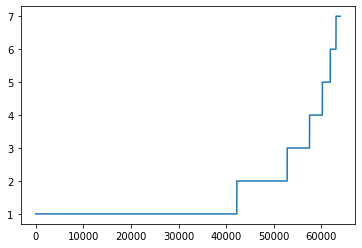

In [34]:
plt.plot(repeating)
plt.show()

In [5]:
file = '../../rsc/session.log'
first_read = open(file ,'r')

num_lines = sum(1 for line in open(file,'r'))
print(num_lines)
count = 0

for x in tqdm(first_read, total=num_lines, position=0, leave=True):
    if x[0] == '1' and x[2] == 's':
        count += 1
    
    if x[0] == '1' and x[2] == 'z':
        print(x)
        print(count)

  1%|▏         | 465638/34233958 [00:00<00:14, 2317080.25it/s]

34233958


 49%|████▉     | 16762413/34233958 [00:06<00:06, 2758329.56it/s]

1 zeroprobs, logprob= -50.8665 ppl= 131.655 ppl1= 162.775

685291


 93%|█████████▎| 31729314/34233958 [00:11<00:00, 2772567.89it/s]

1 zeroprobs, logprob= -22.0524 ppl= 1413.63 ppl1= 4735.79

1316399


100%|██████████| 34233958/34233958 [00:12<00:00, 2727579.40it/s]
